**GRADIO EMAIL CLASSFICATION SYSTEM**

In [2]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Iterate through the uploaded files and load them into pandas
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

    # Load the uploaded CSV file into a pandas DataFrame
    data = pd.read_csv(filename)

    # Display the first few rows of the data
    print(data.head())





Saving spam.csv to spam.csv
Uploaded file: spam.csv
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
pip install pandas scikit-learn gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the 'Category' column (ham = 0, spam = 1)
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

# Vectorize the 'Message' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf_vectorizer.fit_transform(data['Message'])

# Target variable
y = data['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
adaboost_model = AdaBoostClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
adaboost_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
pip install matplotlib seaborn


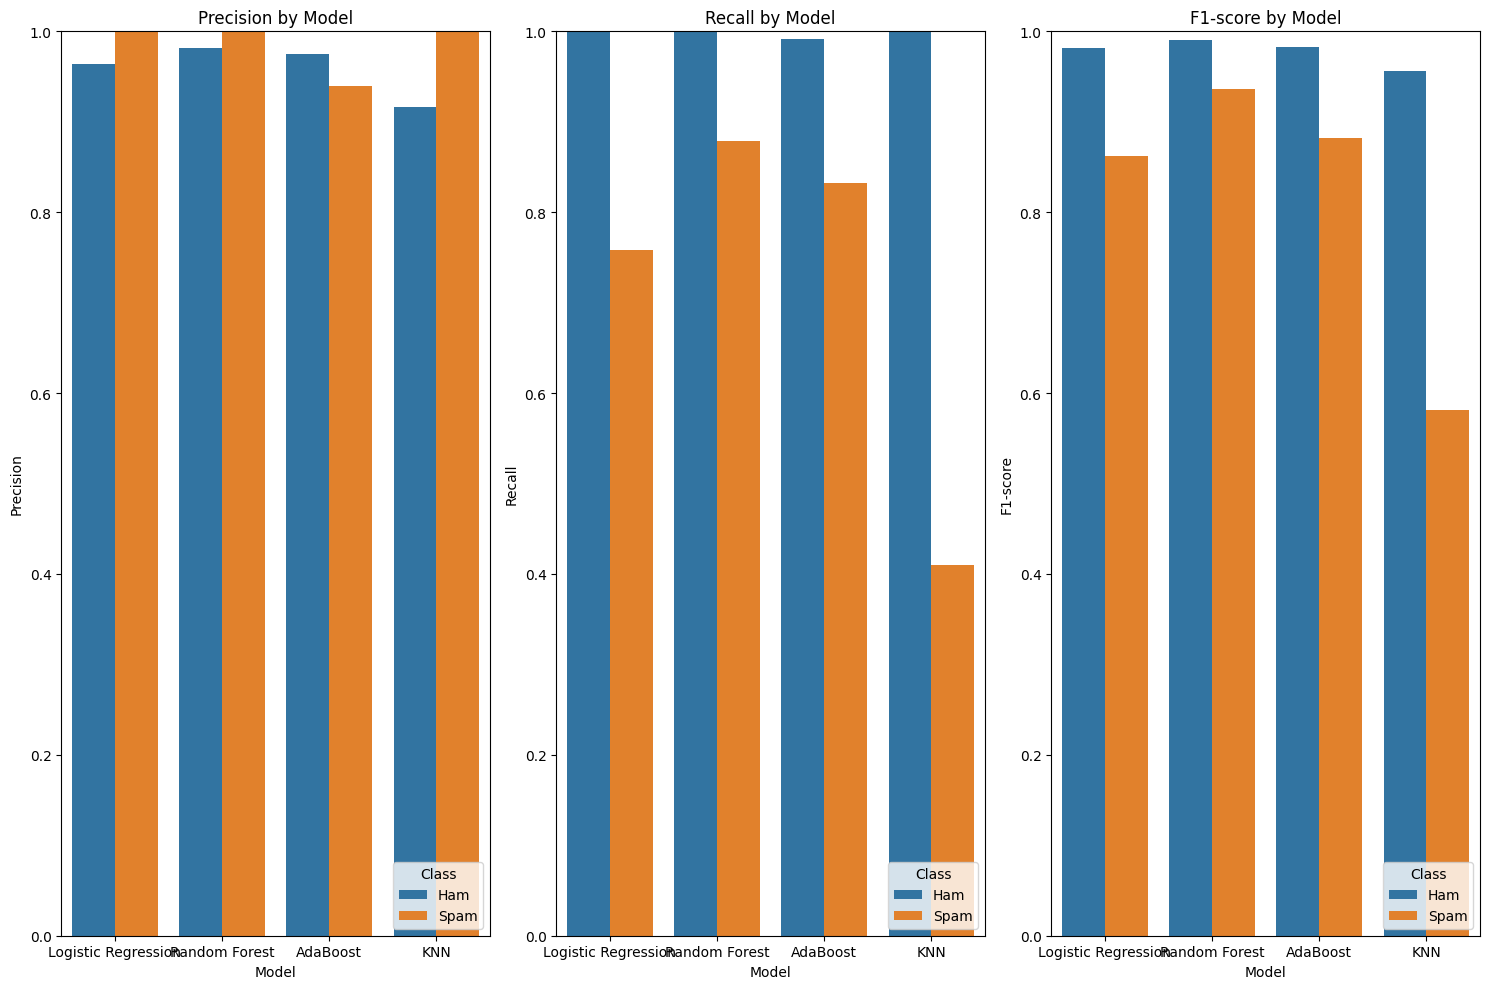

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Get classification reports as dictionaries
logistic_report = classification_report(y_test, logistic_preds, target_names=['Ham', 'Spam'], output_dict=True)
random_forest_report = classification_report(y_test, random_forest_preds, target_names=['Ham', 'Spam'], output_dict=True)
adaboost_report = classification_report(y_test, adaboost_preds, target_names=['Ham', 'Spam'], output_dict=True)
knn_report = classification_report(y_test, knn_preds, target_names=['Ham', 'Spam'], output_dict=True)

# Convert reports to DataFrames for easier plotting
logistic_df = pd.DataFrame(logistic_report).transpose()
random_forest_df = pd.DataFrame(random_forest_report).transpose()
adaboost_df = pd.DataFrame(adaboost_report).transpose()
knn_df = pd.DataFrame(knn_report).transpose()

# Add a model column to each DataFrame
logistic_df['Model'] = 'Logistic Regression'
random_forest_df['Model'] = 'Random Forest'
adaboost_df['Model'] = 'AdaBoost'
knn_df['Model'] = 'KNN'

# Combine all DataFrames
combined_df = pd.concat([logistic_df, random_forest_df, adaboost_df, knn_df])

# Filter only relevant metrics and classes
combined_df = combined_df[combined_df.index.isin(['Ham', 'Spam'])]

# Reset index for easier plotting
combined_df = combined_df.reset_index()

# Plot precision, recall, and F1-score for each model and class
plt.figure(figsize=(15, 10))

metrics = ['precision', 'recall', 'f1-score']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, hue='index', data=combined_df)
    plt.title(f'{metric.capitalize()} by Model')
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Class', loc='lower right')

plt.tight_layout()
plt.show()


In [10]:
pip install --upgrade gradio


In [12]:
import gradio as gr

# Function to classify emails using the selected model
def classify_email(model_name, email_text):
    # Select the model based on user input
    if model_name == "Logistic Regression":
        model = logistic_model
    elif model_name == "Random Forest":
        model = random_forest_model
    elif model_name == "AdaBoost":
        model = adaboost_model
    elif model_name == "K-Nearest Neighbors":
        model = knn_model
    else:
        return "Invalid model selection"

    # Preprocess the input email text
    email_vectorized = tfidf_vectorizer.transform([email_text])

    # Make the prediction
    prediction = model.predict(email_vectorized)[0]

    # Map the prediction to the appropriate label
    return "Spam" if prediction == 1 else "Not Spam"

# Gradio interface
interface = gr.Interface(
    fn=classify_email,
    inputs=[
        gr.Radio(choices=["Logistic Regression", "Random Forest", "AdaBoost", "K-Nearest Neighbors"], label="Choose Model"),
        gr.Textbox(lines=5, placeholder="Enter the email content here...", label="Email Content"),
    ],
    outputs="text",
    title="Email Spam Classifier",
    description="Classify emails as spam or not spam using different machine learning models.",
)

# Launch the Gradio interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b0f4bdf7714fc6056e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
